# X.9.3.
Уравнение Релея во многом похоже на уравнение Ван-дер-Поля [11]. Рассматривается задача вида\
$\dfrac{d^2x}{dt^2} - \mu \left( 1 - \left( \dfrac{dx}{dt}\right) ^ 2 \right) \dfrac{dx}{dt} + x = 0$.\
Решить задачу, записав уравнение Релея в виде системы ОДУ. Начальные
условия: $x(0) = 0, \dot x (0) = 0,001, \mu = 1000, T_k = 1000$

Пусть $y = x'$. Тогда представим уравнение в виде системы\
$
\begin{cases}
    x' = y\\
    y' = \mu (1 - y^2)y - x \\
    x(0) = 0\\
    y(0) = 0,001 \\
\end{cases}
$ \
Решаем систему методом Рунге-Кутты (классическая схема 4 порядка). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mu = 1000
Tk = 1000
x_0 = 0
y_0 = 0.001


def f(t, x, y):
    return y

def g(t, x, y):
    return mu * (1 - y ** 2) * y - x

In [3]:
def ODE(t_grid, tau, x_0, y_0):
    x_grid = [x_0]
    y_grid = [y_0]
    for i in range(len(t_grid) - 1):
        k1 = f(t_grid[i], x_grid[i], y_grid[i])
        m1 = g(t_grid[i], x_grid[i], y_grid[i])
        k2 = f(t_grid[i] + tau / 2, x_grid[i] + tau / 2 * k1, y_grid[i] + tau / 2 * m1)
        m2 = g(t_grid[i] + tau / 2, x_grid[i] + tau / 2 * k1, y_grid[i] + tau / 2 * m1)
        k3 = f(t_grid[i] + tau / 2, x_grid[i] + tau / 2 * k2, y_grid[i] + tau / 2 * m2)
        m3 = g(t_grid[i] + tau / 2, x_grid[i] + tau / 2 * k2, y_grid[i] + tau / 2 * m2)
        k4 = f(t_grid[i] + tau, x_grid[i] + tau * k3, y_grid[i] + tau * m3)
        m4 = g(t_grid[i] + tau, x_grid[i] + tau * k3, y_grid[i] + tau * m3)
        x_n1 = x_grid[i] + tau / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        y_n1 = y_grid[i] + tau / 6 * (m1 + 2 * m2 + 2 * m3 + m4)
        x_grid.append(x_n1)
        y_grid.append(y_n1)
    return x_grid, y_grid

In [16]:
t_min = 0
t_max = Tk

N_0 = 10**6 + 1
# N_max = 12
N = N_0
# while N < N_max:
t_grid, tau = np.linspace(t_min, t_max, N, retstep=True)
x_grid, y_grid = ODE(t_grid, tau, x_0, y_0)

N2 = N * 2 - 1
t_grid2, tau2 = np.linspace(t_min, t_max, N2, retstep=True)
x_grid2, y_grid2 = ODE(t_grid2, tau2, x_0, y_0)

N3 = N2 * 2 - 1
t_grid3, tau3 = np.linspace(t_min, t_max, N3, retstep=True)
x_grid3, y_grid3 = ODE(t_grid3, tau3, x_0, y_0)


In [5]:
def norm(y1, y2):
    N = len(y1)
    val = -1
    for i in range(N):
        val = max(val, abs(y1[i] - y2[i]))
    return val

In [17]:
print(f"norm(N, N2) = {norm(x_grid, [x_grid2[i] for i in range(0, N2, 2)])}")
print(f"norm(N2, N3) = {norm(x_grid2, [x_grid3[i] for i in range(0, N3, 2)])}")

norm(N, N2) = 3.866943351649695
norm(N2, N3) = 4.648122967410018e-06


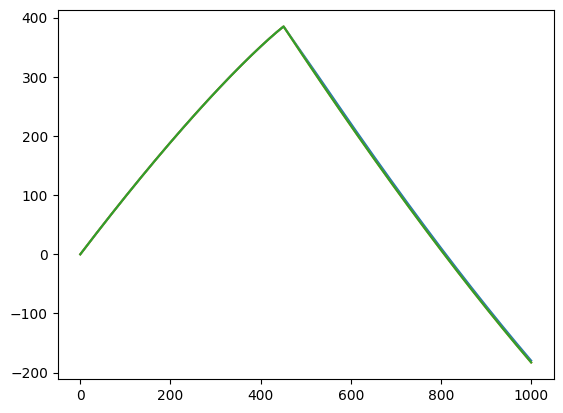

In [18]:
plt.plot(t_grid, x_grid, label=f"N = {N}")
plt.plot(t_grid2, x_grid2, label=f"N = {N2}")
plt.plot(t_grid3, x_grid3, label=f"N = {N3}")